### 在多模态问题中基于 `PASTA` 算法抽取对于任务重要的注意力头

#### 单独使用 `Intel/COCO-Counterfactuals` 数据集抽取注意力头

In [1]:
import os
import json
from datasets import Dataset

DATA_ROOT = "/s/datasets/COCO-Counterfactuals/data"
IMAGE_DIR = os.path.join(DATA_ROOT, "images")
JSONL_PATH = os.path.join(DATA_ROOT, "examples.jsonl")

IMAGE_EXT = ".jpg"


def load_examples(jsonl_path):
    """Load raw examples from examples.jsonl"""
    with open(jsonl_path, "r") as f:
        return [json.loads(line) for line in f]


def build_examples(raw_examples):
    """
    Replicate COCO-Counterfactuals _generate_examples()
    WITHOUT loading images.

    Output fields:
      - id
      - image_0 (absolute path)
      - image_1 (absolute path)
      - caption_0
      - caption_1
    """
    examples = []

    for ex in raw_examples:
        examples.append(
            {
                "id": ex["id"],
                "caption_0": ex["caption_0"],
                "caption_1": ex["caption_1"],
                "image_0": os.path.join(IMAGE_DIR, ex["image_0"] + IMAGE_EXT),
                "image_1": os.path.join(IMAGE_DIR, ex["image_1"] + IMAGE_EXT),
            }
        )

    return examples

raw_examples = load_examples(JSONL_PATH)
examples = build_examples(raw_examples)

dataset = Dataset.from_list(examples)

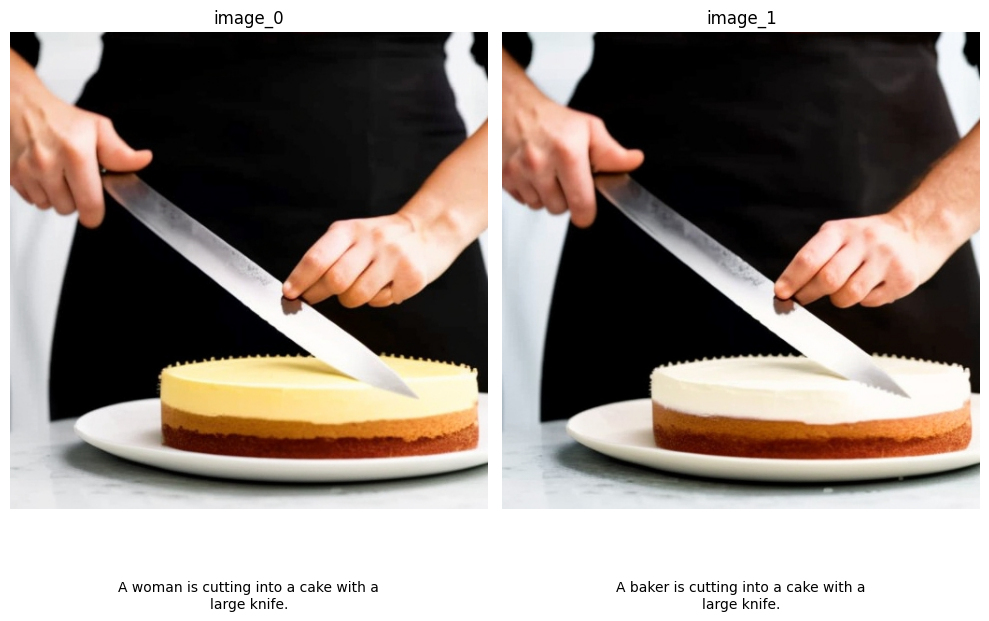

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap

example = dataset[0]

img0 = Image.open(example["image_0"]).convert("RGB")
img1 = Image.open(example["image_1"]).convert("RGB")

plt.figure(figsize=(10, 6))

ax1 = plt.subplot(1, 2, 1)
ax1.imshow(img0)
ax1.set_title("image_0")
ax1.axis("off")
ax1.text(
    0.5, -0.15,
    "\n".join(textwrap.wrap(example["caption_0"], width=40)),
    ha="center",
    va="top",
    transform=ax1.transAxes,
    fontsize=10
)

ax2 = plt.subplot(1, 2, 2)
ax2.imshow(img1)
ax2.set_title("image_1")
ax2.axis("off")
ax2.text(
    0.5, -0.15,
    "\n".join(textwrap.wrap(example["caption_1"], width=40)),
    ha="center",
    va="top",
    transform=ax2.transAxes,
    fontsize=10
)

plt.tight_layout()
plt.show()

#### 测试 `MME` 数据集

In [3]:
from datasets import load_dataset

dataset = load_dataset(
    "parquet",
    data_files="/s/datasets/MME/data/*.parquet",
    split="train"
)

example = dataset[0]
example['image'], example['question']

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1008x1300>,
 'Does this artwork exist in the form of painting? Please answer yes or no.')